<a href="https://colab.research.google.com/github/AchmadWibawa/PCVK/blob/master/pecobaan_tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Impor library yang diperlukan
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [6]:

# Menentukan path dataset pada Google Drive
dataset_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease'

In [7]:
# Menentukan dimensi input gambar dan jumlah kelas
input_shape = (224, 224, 3)
num_classes = 3

In [8]:
# Membuat objek ImageDataGenerator untuk augmentasi data
data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # membagi data menjadi training dan validation set
)

# Menggunakan ImageDataGenerator untuk memuat data pelatihan dan validasi
train_generator = data_generator.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [9]:
# Membangun model dengan MobileNetV2 sebagai base model
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Mengganti layer terakhir base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Menggabungkan base model dengan layer yang telah dimodifikasi
model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan layer-layer pada base model agar tidak ikut dilatih
for layer in base_model.layers:
    layer.trainable = False

# Mengkompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Menyimpan model
model_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/path_to_trained_model.h5'
model.save(model_path)
print("Model saved at", model_path)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
3/3 [==============================] - 29s 9s/step - loss: 1.5434 - accuracy: 0.3542 - val_loss: 0.8248 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.7760 - accuracy: 0.6354 - val_loss: 0.5355 - val_accuracy: 0.7917
Epoch 3/10
3/3 [==============================] - 8s 3s/step - loss: 0.4255 - accuracy: 0.8646 - val_loss: 0.4087 - val_accuracy: 0.8750
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.3807 - accuracy: 0.8229 - val_loss: 0.3742 - val_accuracy: 0.8750
Epoch 5/10
3/3 [==============================] - 9s 3s/step - loss: 0.2187 - accuracy: 0.9479 - val_loss: 0.4780 - val_accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 8s 3s/step - loss: 0.1482 - accuracy: 0.9792 - val_loss: 0.4443 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.1336 - accuracy: 0.9688 - val_loss: 0.3999 

In [25]:
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

1/1 [==============================] - 0s 44ms/step
Predicted class: bacterial_leaf_blight


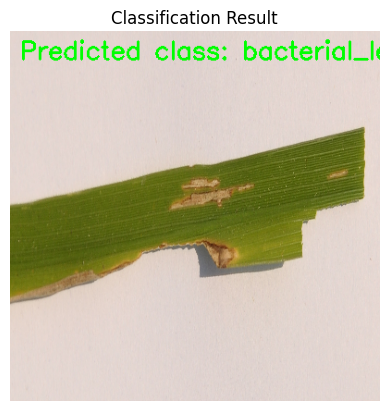

1/1 [==============================] - 0s 42ms/step
Predicted class: brown_spot


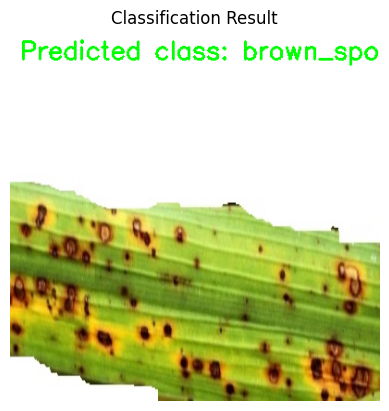

1/1 [==============================] - 0s 47ms/step
Predicted class: leaf_smut


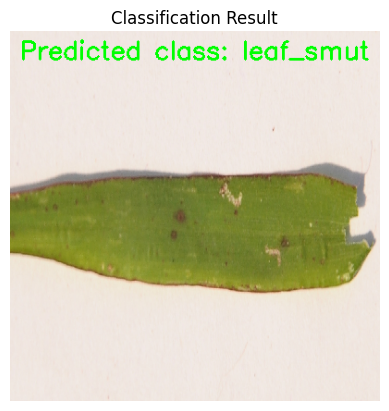

In [27]:
import cv2
import matplotlib.pyplot as plt

# Menampilkan hasil klasifikasi dengan output gambar
def show_classification(image_path, predicted_class):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengubah format warna gambar BGR menjadi RGB
    image = cv2.resize(image, (400, 400))
    cv2.putText(image, "Predicted class: " + predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    plt.imshow(image)
    plt.axis('off')
    plt.title("Classification Result")
    plt.show()

# Memuat beberapa gambar untuk diklasifikasikan
test_images = [
    '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG',
    '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Brown spot/DSC_0100.jpg',
    '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Leaf smut/DSC_0293.JPG'
]

for image_path in test_images:
    image = cv2.imread(image_path)
    image = cv2.resize(image, input_shape[:2])
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)

    # Melakukan klasifikasi gambar
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]

    # Menampilkan hasil klasifikasi
    print("Predicted class:", predicted_class)

    # Menampilkan output gambar
    show_classification(image_path, predicted_class)
